In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore', category=Warning)
import os
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

if str(Path.cwd().parent.parent) not in sys.path:
    sys.path.append(str(Path.cwd().parent.parent))

from utils.metrics import nmad, bias, rmse, out_frac as outf
from settings.columns import broad, narrow, wise, galex, list_feat, create_colors, create_ratio
from settings.paths import bmdn_path

In [2]:
dr3 = 'iDR3n4_DR16Q_GALEX2_unWISE2-ren.csv'
dr4 = 'STRIPE82_DR4_DR16Q1a_unWISE2a_GALEXDR672a.csv'
mags = ['broad', 'narrow', 'wise', 'galex']
configs = {'mag': False, 'col': True, 'rat': False}
feats = ['FUVmag', 'NUVmag', 'u_PStotal', 'J0378_PStotal', 'J0395_PStotal',
         'J0410_PStotal', 'J0430_PStotal', 'g_PStotal', 'J0515_PStotal', 'r_PStotal',
         'J0660_PStotal', 'i_PStotal', 'J0861_PStotal', 'z_PStotal', 'W1_MAG', 'W2_MAG']

In [3]:
def print_results(model_path, return_df=False, specz='z', photoz='zphot'):
    df = pd.read_csv(os.path.join(bmdn_path, model_path, 'Results_DF.csv'))
    cond = ((df[specz] >= 0) & (df[specz] <= 5))
    z = df[specz][cond]
    zml = df[photoz][cond]
    r = 4
    print('nmad', round(nmad(z, zml), r))
    print('rmse', round(rmse(z, zml), r))
    print('bias', round(bias(z, zml), r))
    print('outf0.15', round(outf(z, zml, 0.15), r))
    print('outf0.30', round(outf(z, zml, 0.30), r))
    print('median odds', round(np.median(df['Odds']), r))
    print('median pit', round(np.median(df['PIT']), r))
    print('median crps', round(np.median(df['CRPS']), r))
    if return_df: return df
    return

### Model tests ###

In [4]:
print_results('crossval_model_dr3_newfeatorder')

nmad 0.0544
rmse 0.454
bias 0.0216
outf0.15 0.2072
outf0.30 0.0753
median odds 0.6809
median pit 0.5237
median crps 0.0745


In [5]:
base = print_results('crossval_model_dr4_BNWG', True)

nmad 0.0468
rmse 0.4211
bias 0.0033
outf0.15 0.1889
outf0.30 0.0661
median odds 0.6967
median pit 0.5066
median crps 0.0679


In [6]:
linux = print_results('crossval_model_dr4_BNWG_linux', True)

nmad 0.0487
rmse 0.4242
bias 0.0145
outf0.15 0.1882
outf0.30 0.0655
median odds 0.695
median pit 0.5164
median crps 0.0686


In [7]:
print_results('crossval_model_dr4_BNWG_flag')

nmad 0.0481
rmse 0.4282
bias 0.0199
outf0.15 0.1879
outf0.30 0.0658
median odds 0.7017
median pit 0.5374
median crps 0.067


In [8]:
print_results('crossval_model_dr4_BWG')

nmad 0.0829
rmse 0.4479
bias 0.0154
outf0.15 0.2049
outf0.30 0.0724
median odds 0.448
median pit 0.4948
median crps 0.1074


In [9]:
print_results('crossval_model_dr4_BWG_linux')

nmad 0.0834
rmse 0.4537
bias 0.0141
outf0.15 0.2124
outf0.30 0.0757
median odds 0.4365
median pit 0.484
median crps 0.1078


In [20]:
print_results('crossval_model_dr4_BWG_flag')

nmad 0.0825
rmse 0.4592
bias 0.0365
outf0.15 0.2072
outf0.30 0.0764
median odds 0.4479
median pit 0.5122
median crps 0.1102


### Other tests ###

In [56]:
mags = ['broad', 'wise']
configs = {'mag': True, 'col': True, 'rat': False}
aper = 'PStotal'

# Defining features    
feature_list = []
broad_bool_check = 'broad' in mags
narrow_bool_check = 'narrow' in mags
wise_bool_check = 'wise' in mags
galex_bool_check = 'galex' in mags

if configs['mag']:
    feature_list += list_feat(aper, broad_bool_check, narrow_bool_check, wise_bool_check, galex_bool_check)

if configs['col']:
    feature_list += create_colors(broad_bool_check, narrow_bool_check, wise_bool_check, galex_bool_check, aper)
    
if configs['rat']:
    feature_list += create_ratio(broad_bool_check, narrow_bool_check, wise_bool_check, galex_bool_check, aper)

print(feature_list)

['u_PStotal', 'g_PStotal', 'r_PStotal', 'i_PStotal', 'z_PStotal', 'W1', 'W2', 'u_PStotal-r_PStotal', 'g_PStotal-r_PStotal', 'r_PStotal-i_PStotal', 'r_PStotal-z_PStotal', 'r_PStotal-W1', 'r_PStotal-W2']


In [57]:
features = feature_list

magnitudes = [feat for feat in features if ('-' not in feat) and ('/' not in feat)]
colors = [feat for feat in features if ('-' in feat)]
ratios = [feat for feat in features if ('/' in feat)]

broad_bool, narrow_bool, wise_bool, galex_bool = False, False, False, False
mag = any(magnitudes)
col = any(colors)
rat = any(ratios)

check_pair = lambda x: x[0] if x[1]=='r_PStotal' else x[1]

if mag: aux_list = magnitudes
elif col: aux_list = [check_pair(feat.split('-')) for feat in features]
elif rat: aux_list = [check_pair(feat.split('/')) for feat in features]

broad_bool = broad[0] in aux_list
narrow_bool = narrow[0] in aux_list
wise_bool = wise[0] in aux_list
galex_bool = galex[0] in aux_list

True
True
True
True
True
True
True


In [42]:
broad_bool, narrow_bool, wise_bool, galex_bool

(True, False, False, False)

In [74]:
loss = pd.read_csv('D:/Documentos/qucats_paper/results/bmdn/final_model_dr4_BNWG/SavedModels/Fold0/Seed47_Fold0.csv', index_col=0)

In [75]:
print(loss['loss'].argmin()+1, loss.loc[loss['loss'].argmin(), 'loss'].round(2))

590 -0.74


In [73]:
print(loss['loss'].argmin()+1, loss.loc[loss['loss'].argmin(), 'loss'].round(2))

798 -0.84


No handles with labels found to put in legend.


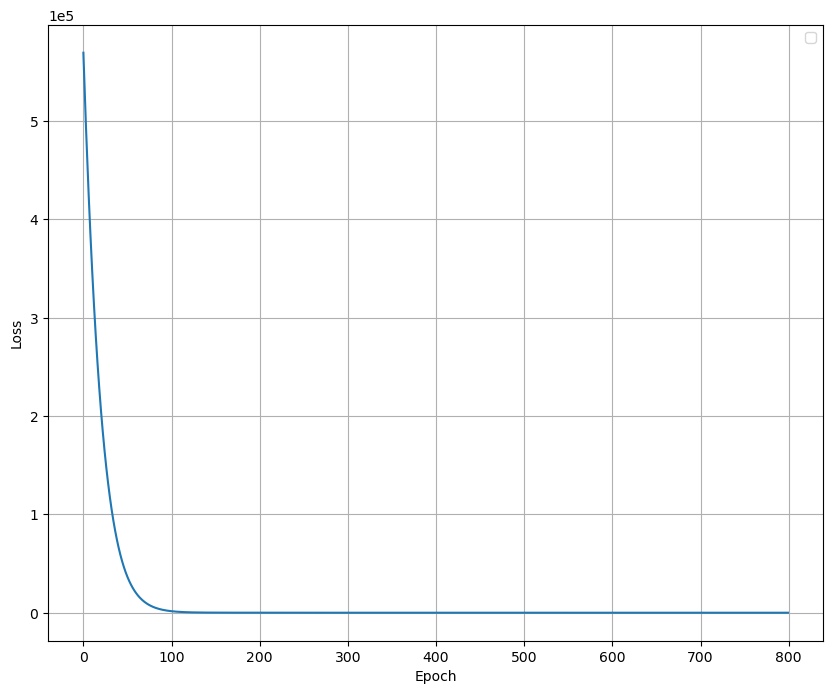

In [72]:
plt.figure(figsize=(10, 8))
plt.plot(list(range(800)), loss['loss'])
# plt.plot(list(range(396)), loss.loc[:395, 'loss'], label='loss > 0')
# plt.plot(list(range(396, 600)), loss.loc[396:, 'loss']+0.7119247317314148, label='loss < 0')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-1, 5))
#plt.yscale('log')
plt.legend()
plt.show()

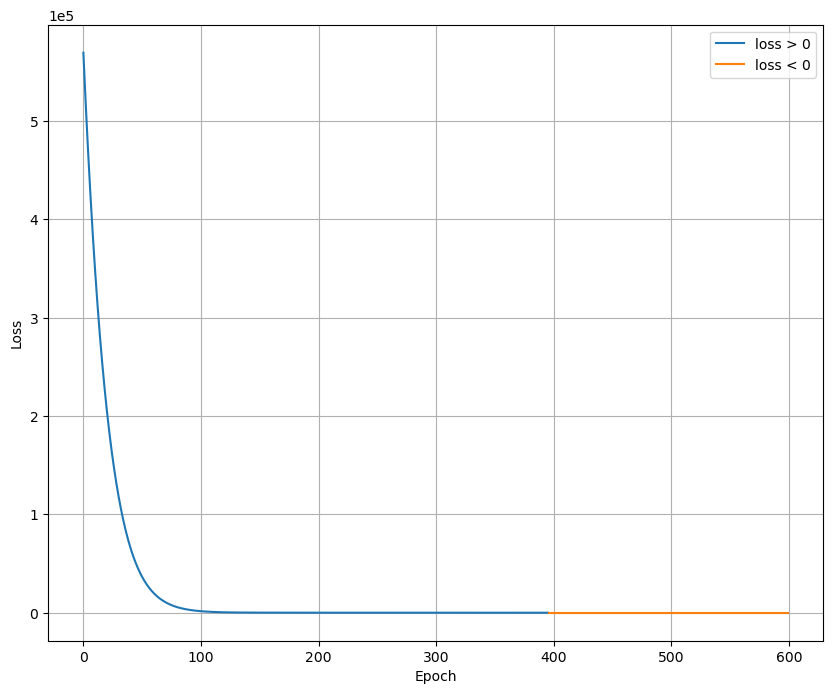

In [51]:
plt.figure(figsize=(10, 8))
plt.plot(list(range(396)), loss.loc[:395, 'loss'], label='loss > 0')
plt.plot(list(range(396, 600)), loss.loc[396:, 'loss']+0.7119247317314148, label='loss < 0')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-1, 5))
#plt.yscale('log')
plt.legend()
plt.show()

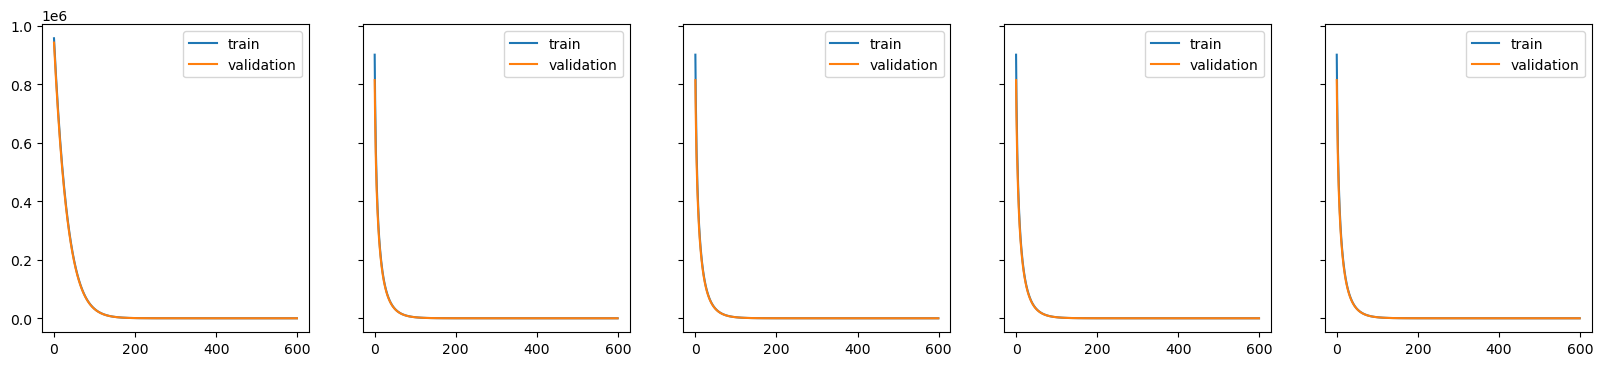

In [68]:
fig, ax = plt.subplots(1, 5, figsize=(20, 4), sharex=True, sharey=True)
for i in range(5):
    df = pd.read_csv(os.path.join(bmdn_path, 'crossval_model_dr4_BNWG', 'SavedModels', f'Fold{i}', f'Seed47_Fold{i}.csv'))
    ax[i].plot(range(len(df)), df['loss'], label='train')
    ax[i].plot(range(len(df)), df['val_loss'], label='validation')
    ax[i].legend()
plt.show()

In [66]:
for i in range(5):
    df = pd.read_csv(os.path.join(bmdn_path, 'crossval_model_dr4_BNWG', 'SavedModels', f'Fold{i}', f'Seed47_Fold{i}.csv'))
    print(df['loss'].argmin()+1, df['val_loss'].argmin()+1)
    print(df.loc[df['loss'].argmin(), 'loss'].round(2), df.loc[df['val_loss'].argmin(), 'val_loss'].round(2))

600 600
1.28 1.9
599 599
0.14 0.89
600 599
0.08 1.04
600 599
0.06 0.86
600 597
0.08 0.98
